In [1]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
from testUtils.spleenTest import get_spleen_data
import pandas as pd


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
shape_props=(32, 32, 16, 3, 2)
shape_probs=(32, 32, 16, 2)
props= np.random.random(shape_props)
probs= np.random.random(shape_probs)


In [8]:
a= np.multiply(probs,props[:,:,:,0,:] )
b= np.multiply(probs,props[:,:,:,1,:] )
c= np.multiply(probs,props[:,:,:,2,:] )
res_stacked= np.stack( [a,b,c], axis=-2)
res_stacked.shape


(32, 32, 16, 3, 2)

In [9]:
probss=einops.repeat(probs,'h w d p-> h w d r p',r=3)
res_res=np.multiply(probss,props)
res_res.shape

(32, 32, 16, 3, 2)

In [10]:
np.allclose(res_stacked,res_res )

True

In [2]:
cached_subj =get_spleen_data()[0]
sample_3d_ct=cached_subj[0]
sample_2d_ct=sample_3d_ct[0,0,:,:,64]
sample_2d_Slic=cached_subj[2][:,:,64]



data loaded from hdf5


In [3]:
jax.image.resize(sample_3d_ct, (1,1,20,20,20), "linear")

Array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

(256, 256)

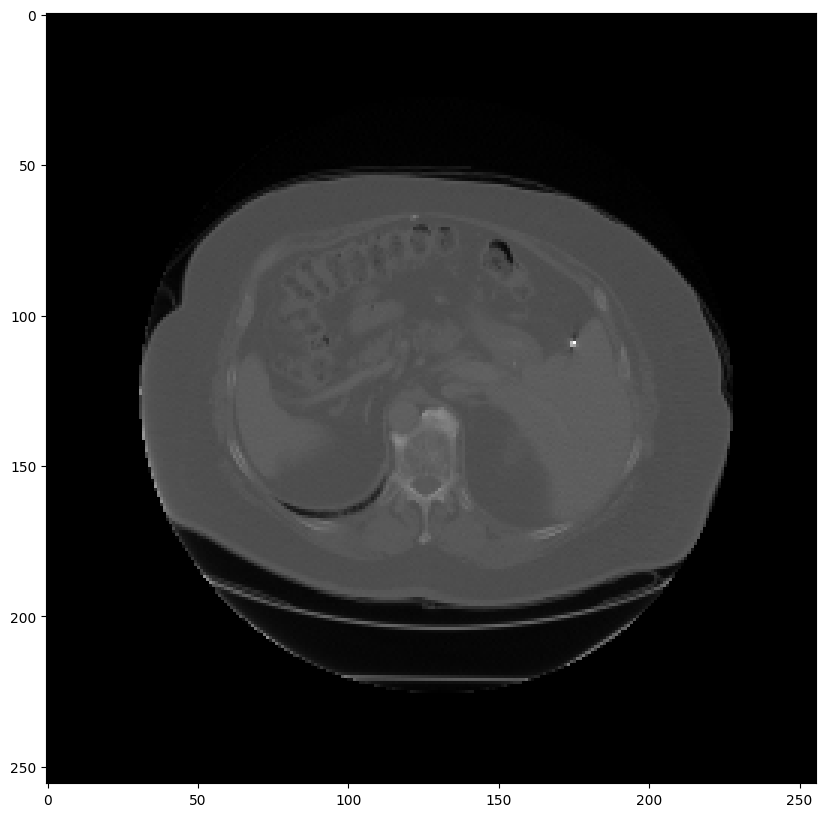

In [4]:
plt.figure(figsize=(20, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(sample_2d_ct))
sample_2d_ct.shape

(1, 256, 128)


TypeError: Invalid shape (256, 1, 128) for image data

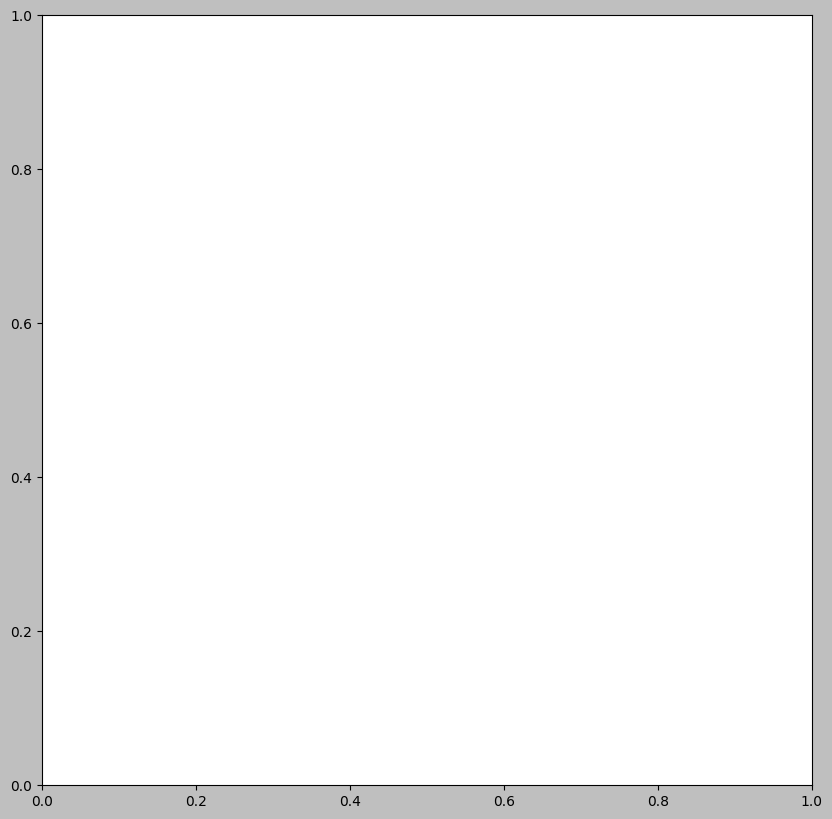

In [5]:
print(sample_2d_Slic.shape)
# sample_2d_Slic=jax.image.resize(sample_2d_Slic, (20,20), "linear")
plt.figure(figsize=(20, 10))
# plt.style.use('grayscale')
plt.imshow(np.rot90(sample_2d_Slic))

In [ ]:
import pywt, scipy.misc
import jaxwt as jwt
import jax.numpy as jnp

#,level=2, mode="reflect"
@jax.jit
def test(sample_2d_ct):                           
    transformed = jwt.wavedec2(sample_2d_ct, pywt.Wavelet("haar"),mode="zero")
    # print(len(transformed))
    # print(transformed[0].shape)
    return jwt.waverec2(transformed, pywt.Wavelet("haar"))
reconstruction=test(sample_2d_ct)

plt.imshow(np.rot90(reconstruction))



In [ ]:
aaa=jnp.arange(4*4*4)
aaa=jnp.reshape(aaa,(1,1,4,4,4))
print(f"aaa {aaa}")
# a,b=einops.rearrange(aaa,'ba c w (a b) d->b ba c w a d',b=2)
# a,b=einops.rearrange(aaa,'ba c (a b) h d->b ba c a h d',b=2)
a,b=einops.rearrange(aaa,'ba c w h (a b)->b ba c w h a',b=2)
a

In [ ]:
# def normpdf(x, mean, sd):
#     var = jnp.power(float(sd),2)
#     denom = jnp.power((2*jnp.pi*var),.5)
#     num = jnp.exp(-jnp.power((float(x)-float(mean)),2)/(2*var))
#     return num/denom
# normpdf(0.1,0.0,0.2)
jnp.equal(jnp.array([1,2,3]),jnp.array([1,2,4]))
# float(jax.scipy.stats.norm.pdf(0.001, loc=0, scale=0.01)

In [ ]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
import numpy as np
import toolz
from einops import rearrange
from functools import partial

In [ ]:
test_mage_shape= (1,1,32,32)
prob0_v= np.random.rand(np.product((1, 2, 2, 2))).reshape((1, 2, 2, 2))
prob0_h= np.random.rand(np.product((1, 2, 4, 2))).reshape((1, 2, 4, 2))
prob0_h_flat= np.random.rand(480)
# aranged_test_im= np.arange(np.product(list(test_mage_shape)))
aranged_test_im= np.random.rand(np.product(list(test_mage_shape)))
aranged_test_im= np.reshape(aranged_test_im, test_mage_shape)

b,c,w,h = test_mage_shape


In [ ]:
# def cross_entropy(logprobs, targets):
#   target_class = jnp.argmax(targets, axis=1)
#   nll = jnp.take_along_axis(logprobs, jnp.expand_dims(target_class, axis=1), axis=1)
#   ce = -jnp.mean(nll)
#   return ce

@jax.vmap
def my_cross_entropy_loss(logits, label):
  return -logits[label]


In [ ]:
### calculating gt_id as far as I see it is deterministic given image and dimension of intrest



# a1,a2=einops.rearrange(aranged_test_im,'ba c (a b) h->b ba c a h',b=2)
def lab_s_dim_loss(pair, axis_to_sub,prob):
    a1,a2=pair
    
    # print(f"aa {a2.take(indices=range(0, -1), axis=axis_to_sub).shape} bb {a2.take(indices=range(1,a2.shape[axis_to_sub]-1), axis=axis_to_sub).shape} ")
    # print(f"aa {a2.take(indices=range(0, -1), axis=axis_to_sub).shape} bb {a2.take(indices=range(1,a2.shape[axis_to_sub]-1), axis=axis_to_sub).shape} ")
    
    sub1=a2.take(indices=range(0, a2.shape[axis_to_sub]-1), axis=axis_to_sub)- a1.take(indices=range(0, a1.shape[axis_to_sub]-1), axis=axis_to_sub)
    sub2=a2.take(indices=range(0, a2.shape[axis_to_sub]-1), axis=axis_to_sub)- a1.take(indices=range(1,a1.shape[axis_to_sub]), axis=axis_to_sub)
   
    cat_feat=einops.rearrange([sub1,sub2],'baba ba c w h->ba (c baba ) w h')

    # cat_feat=einops.rearrange([(a2[:,:, :,0:-1]-a1[:,:,:,0:-1])
    #                 ,(a2[:,:,:,0:-1]-a1[:,:,:,1:])], 'baba ba c w h->ba (c baba ) w h')
    # cat_feat=einops.rearrange([(a2[:,:, 0:-1 ,:]-a1[:,:,0:-1,:])
    #                 ,(a2[:,:, 0:-1 ,:]-a1[:,:,1:,:])], 'baba ba c w h->ba (c baba ) w h')
    
    cat_feat=cat_feat*cat_feat
    cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
    to_id= einops.rearrange(cat_feat,'b c w h-> (b w h c)')
    to_id= einops.rearrange(to_id,'(a b)-> a b',b=2)

    gt_id= jnp.argmax(to_id,axis=1, keepdims=False)
    # gt = cat_feat[:, 0, :, :] - cat_feat[:, 1, :, :] #so we are working on channel
    # weight = gt * gt
    # print(f"prob {prob.shape}")
    # prob_scaled= prob.take(indices=range(0, prob.shape[axis_to_sub],2), axis=axis_to_sub)
    # # prob_scaled= prob.take(indices=range(0, prob.shape[axis_to_sub]-2,2), axis=axis_to_sub)
    # prob_scaled= einops.rearrange(prob_scaled,'b c w h-> (b w h c)')
    # prob_scaled= einops.rearrange(prob_scaled,'(a b)-> a b',b=2)
    
    # print(f" prob_scaled {prob_scaled.shape} gt_id {gt_id.shape} ")
    # color_loss=my_cross_entropy_loss(prob_scaled,gt_id)
    

    return to_id


prob0_hh= jnp.array(prob0_h)
# aranged_test_im= jnp.ones(test_mage_shape)
gt_id=lab_s_dim_loss(einops.rearrange(jnp.array(aranged_test_im),'ba c (a b) h->b ba c a h',b=2),axis_to_sub=2,prob=prob0_hh)
# gt_id=lab_s_dim_loss(einops.rearrange(aranged_test_im,'ba c w (a b)->b ba c w a',b=2),axis_to_sub=3)
print(gt_id)
gt_id.shape
# jnp.ravel(cat_feat)


In [ ]:
shapee=(16,16,16)
aaa=np.ones(shapee)
# aaa[2,2,2]=2
aaa[0:8,0:8,0:8]=2
# aaa[1,0,0]=2
# aaa=np.arange(np.product(list(shapee))).reshape(shapee)
# aaa[:,::2,:]=2
# aaa[::2,:,:]=2
# aaa[:,:,::2]=2
aaa= jnp.array(aaa)
# sh= aaa.shape
# chosen_axis=0
# to_query=[0,aaa[0],0,aaa[1],0,aaa[2]]  
# sub_up_indicies_a=to_query.copy()
# sub_up_indicies_b=to_query.copy()
# sub_down_indicies_a=to_query.copy()
# sub_down_indicies_b=to_query.copy()
# sub_up_indicies_a[((chosen_axis+1)*2)-1]=-1
# sub_up_indicies_b[chosen_axis*2]=1

# sub_up_indicies_a[((chosen_axis+1)*2)-1]=-1
# sub_up_indicies_b[chosen_axis*2]=1

def compare_up_and_down(vect):
    res=jnp.stack([jnp.equal(vect[1:-1],vect[2:] ),
                jnp.equal(vect[1:-1],vect[0:-2] )],axis=1)
    return jnp.pad(res,((1,1),(0,0)))

v_compare_up_and_down=jax.vmap(compare_up_and_down, in_axes=(0,), out_axes=0)
v_v_compare_up_and_down=jax.vmap(v_compare_up_and_down, in_axes=(0,), out_axes=0)
res=v_v_compare_up_and_down( aaa)


# sub_up=jnp.equal(jnp.take(aaa, jnp.arange(0,len_in_axis-1), axis=chosen_axis),jnp.take(aaa,  jnp.arange(1,len_in_axis), axis=chosen_axis))
# sub_up=jnp.equal(aaa[1:-1,:,:],aaa[0:-2,:,:]  )
# sub_down=jnp.equal(aaa[1:-1,:,:],aaa[2:,:,:]  )
# sub_down=jnp.equal(aaa,jnp.roll(aaa, -1, axis=chosen_axis))

# print(f"rolled {jnp.roll(aaa, 1, axis=chosen_axis)} ")
print(f"res {jnp.sum(res)}")
# print(f"sub_down {sub_down} ")
plt.figure(figsize=(4,4))
# plt.style.use('grayscale')
# plt.imshow(jnp.logical_and(sub_up[:,:,7],sub_down[:,:,7]))
plt.imshow(res[:,1,:,1])
# plt.imshow(jnp.take(aaa, jnp.arange(1,len_in_axis), axis=chosen_axis)[:,:,])
# print(f"sub_up {sub_up.shape} sub_down {sub_down.shape} ")

In [ ]:
import flax
def diff_round(x):
    """
    differentiable version of round function
    """
    return x - jnp.sin(2*jnp.pi*x)/(2*jnp.pi)

def harder_diff_round(x):
    return diff_round(diff_round(diff_round(diff_round(diff_round(x)))))

v_harder_diff_round=jax.vmap(harder_diff_round)
grid_vect=jnp.arange(10)
probs= jnp.array(np.random.random((10,2)))
probs= flax.linen.softmax(probs,axis=1)
thresholded = v_harder_diff_round(probs)
grid_vect= jnp.pad(grid_vect,(1,1))
stacked = jnp.stack([grid_vect[:-2],grid_vect[2:]],axis=1)
mult=jnp.multiply(stacked,thresholded)
jnp.round(jnp.sum(mult,axis=1),2).shape
# print(grid_vect[:-2])
# print(grid_vect[1:-1])
# print(grid_vect[2:])
# image=jnp.arange(3*3)
# aaa=einops.rearrange(image, '(a x) -> a x ', a=3)

# einops.repeat(aaa, 'h w ->c h w ', c=2)


In [ ]:
shape = (5,2)
probs=jnp.arange(1,np.product(list(shape))+1).reshape(shape)
# probs= jnp.pad(probs,((1,0),(0,0)))
rolled=probs.flatten()[1:-1].reshape(shape[0]-1,2)
rolled=jnp.sum(rolled,axis=1)
rolled=einops.rearrange(rolled,'(a b)-> a b',b=2)
print(rolled)
grid_vect=jnp.pad(jnp.arange(1,6),(0,1))
grid_vect=einops.rearrange(grid_vect,'(a b)-> a b',b=2)

#we are still before sigmoid or softmax

grid_vect
# set bigget examples and mark just those points 
# that intrest me

In [ ]:
    [[ 1  2]
x1    [ 3  4]
    [ 5  6]
x2    [ 7  8]
    [ 9 10]]

x1    [[ 5,  9],
x2    [13, 17]]


In [ ]:
a=jnp.arange(1,6)
b=jnp.arange(1,6)*10
jnp.stack([a,b],axis=1).flatten()

In [ ]:
def diff_round(x):
    return x - jnp.sin(2*jnp.pi*x)/(2*jnp.pi)
x=0.1
diff_round(diff_round(diff_round(diff_round(x))))

In [ ]:
kernel_v = jnp.array([[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]],dtype=jnp.float32)
# kernel_v=einops.rearrange(kernel_v,'c x y-> 1 c x y')

image_rgb= jnp.array(aranged_test_im,dtype=jnp.float32)
print(image_rgb.shape)
# image_rgb=einops.rearrange(image_rgb,'b c x y-> (b c x) y')
image_rgb = jnp.pad(image_rgb, ((0, 0),(0, 0),(0, 0), (1, 1)), mode='edge')# seem in numpy we are padding from first to last axis and in pytorch in opposite way

repeated= einops.repeat(kernel_v, 'c h w -> (c c2) 1 h w', c2=c)
print(f"repeated {repeated.shape} padded {image_rgb.shape}")

cat_feat = lax.conv_general_dilated(image_rgb,    # lhs = NCHW image tensor
               repeated, # rhs = OIHW conv kernel tensor
               (2, 1),  # window strides
                padding=((0, 0),(0, 0)),
               feature_group_count= c) # padding mode
print(f"cat_feat {cat_feat} ")
cat_feat = cat_feat*cat_feat

cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
b, c, h, w = cat_feat.shape
print(f" cat_feat.shape {cat_feat.shape}")
b, c, h, w = cat_feat.shape
cat_feat= einops.rearrange(cat_feat,'b c h w->(b h w c)')
cat_feat= einops.reduce(cat_feat,'(a b)-> a', 'max',b=2)

# cat_feat=reduce(x, 't b c -> b c', 'max')
print(f"cat_feat reduced {cat_feat.shape}")
# _, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)

# print(f"gt_id {gt_id.shape} permuted {cat_feat.permute(0, 2, 3, 1).shape} reshaped {cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).shape} ")



In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from skimage.segmentation import mark_boundaries
import cv2
label= torch.from_numpy(aranged_test_im).float()
prob0_h= torch.from_numpy(prob0_h).float()
prob0_h_flat= torch.from_numpy(prob0_h_flat).float()
_, color_c, _, _ = label.shape


kernel = [[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]]
kernel = torch.tensor(kernel).float().repeat(color_c, 1, 1).unsqueeze(1)
# cat_feat = img
label = F.pad(label, (1, 1, 0, 0), mode='replicate')
cat_feat = F.conv2d(label, kernel, stride=(2, 1), padding=(0, 0), groups=color_c)
cat_feat = cat_feat*cat_feat

cat_feat = F.relu(-F.relu(cat_feat)+1)
b, c, h, w = cat_feat.shape
_, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)
# print(f"reshaped prob {prob0_h[:, :, 1:-1:2, :].permute(0, 2, 3, 1).reshape(-1, 2).shape} gt_id {gt_id.shape}")
# color_loss = torch.nn.functional.cross_entropy(prob0_h_flat, gt_id.float(),reduction='none')
# color_loss = cross_loss(prob0_h[:, :, 1:-1:2, :].permute(0, 2, 3, 1).reshape(-1, 2), gt_id)
# color_loss = cross_loss(prob0_h_flat, gt_id.float())
# print(f"color_loss {color_loss.shape}")
# color_loss = color_loss.view(b, h, w)

# gt = cat_feat[:, 0, :, :] - cat_feat[:, 1, :, :]
# weight = gt * gt
# color_loss = weight*color_loss
# color_loss = torch.sum(torch.sum(color_loss, dim=-1), dim=-1)
gt_id

In [ ]:
_, color_c, _, _ = label.shape
kernel = [[[0, 0, 0], [-1, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, -1], [0, 0, 0]]]


            
kernel = torch.tensor(kernel).float().repeat(color_c, 1, 1).unsqueeze(1)
# cat_feat = img
label = F.pad(label, (0, 0, 1, 1), mode='replicate')
cat_feat = F.conv2d(label, kernel, stride=(1, 2), padding=(0, 0), groups=color_c)
cat_feat = cat_feat * cat_feat
print(f"cat_feat {cat_feat}")

cat_feat = F.relu(-F.relu(cat_feat) + 1)
b, c, h, w = cat_feat.shape
_, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)
print(gt_id.shape)
gt_id

In [ ]:
aaa=get_spleen_data()

In [ ]:
import more_itertools
import toolz
n=3
chunked=list(more_itertools.chunked(aaa, n))
unipped=list(map(toolz.sandbox.core.unzip,chunked ))
unipped=list(map(lambda inn: list(map(list,inn)),unipped ))
# len(unipped[0][0][0])
unipped=list(map(lambda inn: list(map(np.concatenate,inn)),unipped ))


# unipped[0][0][0].shape

In [ ]:
# # a= jnp.reshape(jnp.arange(1,17),(4,4) )
# # b= jnp.reshape(jnp.arange(20,36),(4,4) )
# # einops.rearrange([a,b], 'b a p-> (a b) p ')

# image_shape=(7,9)
# label=jnp.ones(image_shape)
# label=label.at[2,3].set(2)
# label=label.at[2,2].set(2)
# print(f"label \n {label} ")

# dim_stride=1
# main=label.take(indices=jnp.arange(1,image_shape[dim_stride]-1),axis=dim_stride)
# back=label.take(indices=jnp.arange(0,image_shape[dim_stride]-2),axis=dim_stride)
# forward=label.take(indices=jnp.arange(2,image_shape[dim_stride]),axis=dim_stride)
# print(f"back \n {jnp.equal(main,back).astype(int)}")
# print(f"front \n {jnp.equal(main,forward).astype(int)}")
# res=jnp.stack([jnp.equal(main,back),jnp.equal(main,forward )],axis=-1)
# print(f"shapee {res.shape}")
# jnp.logical_and(jnp.equal(main,back),jnp.equal(main,forward )).astype(int)
# # label

def disp_to_pandas(probs,shappe ):
    probs_to_disp= einops.rearrange(probs,'w h c-> (w h) c')
    probs_to_disp=list(map(lambda twoo: f"{twoo[0]} {twoo[1]}",list(probs_to_disp)))
    probs_to_disp=np.array(probs_to_disp).reshape(shappe)
    return pd.DataFrame(probs_to_disp)


In [ ]:
sh=(4,5,2)
dim_stride=0
len= np.product(list(sh))
a= jnp.arange(1,len+1).reshape(sh)
print(a)
a=a.flatten()
a= jnp.roll(a,shift=1)
a= jnp.reshape(a,sh)
a

In [ ]:
w=4
h=6
probs_shape=(w,h)
sh=(w,h)
probs=jnp.arange(1,(w*h*2)+1)
probs=probs.reshape((w,h,2))


def roll_in(probs,dim_stride,probs_shape):
    probs_back=probs[:,:,0]
    probs_forward=probs[:,:,1]
    probs_back=jnp.take(probs_back, indices=jnp.arange(1,probs_shape[dim_stride]),axis=dim_stride )
    probs_forward=jnp.take(probs_forward, indices=jnp.arange(0,probs_shape[dim_stride]-1),axis=dim_stride )
    return jnp.stack([probs_forward,probs_back],axis=-1)

def grid_build(res_grid,probs,dim_stride,probs_shape):
    roll_in(probs,dim_stride,probs_shape)
# print("mainnn")
# print( disp_to_pandas(probs,(w,h)))
# print("roll w")
# dim_stride=1
# rolled_w=roll_in(probs,dim_stride,(w,h))
# print( disp_to_pandas(rolled_w,(rolled_w.shape[0],rolled_w.shape[1])))
# print("roll h")
# dim_stride=0
# rolled_h=roll_in(probs,dim_stride,(w,h))
# print( disp_to_pandas(rolled_h,(rolled_h.shape[0],rolled_h.shape[1])))

In [ ]:
# def disp_to_pandas(probs,shappe ):
#     probs_to_disp= einops.rearrange(probs,'w h c-> (w h) c')
#     probs_to_disp=jnp.round(probs_to_disp,1)
#     probs_to_disp=list(map(lambda twoo: f"{twoo[0]} {twoo[1]}",list(probs_to_disp)))
#     probs_to_disp=np.array(probs_to_disp).reshape(shappe)
#     return pd.DataFrame(probs_to_disp)

def for_pad_divide_grid(current_grid_shape,axis,r):
    for_pad_rem= jnp.remainder(current_grid_shape[axis]-r,2*r)
    if(for_pad_rem>0):
        return 2*r-for_pad_rem
    #if for_pad_rem==0 we do not need to pad
    return for_pad_rem    


def get_supervoxel_id(shift_x:bool,shift_y:bool,r:int,orig_grid_shape:Tuple[int],current_grid_shape:Tuple[int]):
    """
    In order to be able to vmap through the supervoxels we need to have a way 
    to tell what id should be present in the area we have and that was given by main part of 
    divide_sv_grid function the supervoxel ids are based on the orig_grid_shape  generally 
    we have the supervoxel every r but here as we jump every 2r we need every second id
    """
    res_grid=jnp.mgrid[1:orig_grid_shape[0], 1:orig_grid_shape[1]]
    res_grid=einops.rearrange(res_grid,'p x y-> x y p')
    res_grid=einops.repeat(res_grid,'x y p-> x y p')
    return res_grid[int(shift_x): orig_grid_shape[0]-int(shift_x):2,
                    int(shift_y): orig_grid_shape[1]-int(shift_y):2, ]

def divide_sv_grid(res_grid: jnp.ndarray,shift_x:bool,shift_y:bool,r:int,orig_grid_shape:Tuple[int],current_grid_shape:Tuple[int]):
    """
    as the supervoxel will overlap we need to have a way to divide the array with supervoxel ids
    into the set of non overlapping areas - we want thos area to be maximum possible area where we could find
    any voxels associated with this supervoxels- the "radius" of this cube hence can be calculated based on the amount of dilatations made
    becouse of this overlapping we need to be able to have at least 8 diffrent divisions
    we can work them out on the basis of the fact where we start at each axis at 0 or r - and do it for
    all axis permutations 2**3 =8
    we need also to take care about padding after removing r from each axis the grid need to be divisible by 2*r
    """
    #first we cut out all areas not covered by current supervoxels
    cutted=res_grid[r*shift_x: current_grid_shape[0]- r*(not shift_x),r*shift_y: current_grid_shape[1]- r*(not shift_y)]
    pad_x=for_pad_divide_grid(current_grid_shape,0,r)
    pad_y=for_pad_divide_grid(current_grid_shape,1,r)
    cutted= jnp.pad(cutted,(
                        (pad_x*(not shift_x),pad_x*shift_x)
                        ,(pad_y*(not shift_y),pad_y*shift_y)
                        ,(0,0)))
    cutted=einops.rearrange( cutted,'(a x) (b y) p-> a b x y p', x=2*r,y=2*r)
    return cutted


w=17
h=19
dim_stride=0
grid_shape=(w,h)
probs_shape=(w,h//2)
sh=(w,h)

res_grid=jnp.mgrid[1:w+1, 1:h+1].astype(jnp.float16)
res_grid=einops.rearrange(res_grid,'p x y-> x y p')
res_grid=einops.repeat(res_grid,'x y p-> x y p')
orig_grid_shape=res_grid.shape
current_grid_shape=res_grid.shape
aa=divide_sv_grid(res_grid,True,True,2,orig_grid_shape,current_grid_shape)
aa.shape

In [23]:
a=jnp.array([1.0,2.0,3.0])
b=jnp.array([2.0,2.0,3.0])

def diff_round(x):
    """
    differentiable version of round function
    """
    return x - jnp.sin(2*jnp.pi*x)/(2*jnp.pi)

def soft_equal(a,b):
    """
    differentiable version of equality function
    adapted and improved version of https://kusemanohar.wordpress.com/2017/01/05/trick-to-convert-a-indicator-function-to-continuous-and-differential-function/
    """
    return diff_round(diff_round(jnp.exp(-jax.numpy.linalg.norm(a-b,ord=2))))


Array(0.09126487, dtype=float32)